In [ ]:
import pandas as pd

file_path = '/content/2025.xlsx'
data = pd.read_excel(file_path)
data.columns = ['Tanggal', 'Curah_Hujan']
data.head()

,Tanggal,Curah_Hujan
0,2025-01-01 00:00:00,8888
1,2025-01-02 00:00:00,53.6
2,2025-01-03 00:00:00,26.6
3,2025-01-04 00:00:00,0
4,2025-01-05 00:00:00,2


In [ ]:
#konversi tanggal
try:
    data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d-%m-%Y', errors='coerce')
    if data['Tanggal'].isna().sum() == 0:
        print("Semua data tanggal berhasil dikonversi dengan benar.")
    else:
        print(f"Ada {data['Tanggal'].isna().sum()} entri tanggal yang gagal dikonversi.")
except Exception as e:
    print("Kesalahan saat konversi tanggal:", e)

# Cek tipe datetime
if pd.api.types.is_datetime64_any_dtype(data['Tanggal']):
    print("Kolom Tanggal bertipe datetime64.")
else:
    print("Kolom Tanggal belum bertipe datetime64.")

Semua data tanggal berhasil dikonversi dengan benar.
Kolom Tanggal bertipe datetime64.


In [ ]:
data.head()

,Tanggal,Curah_Hujan
0,2025-01-01,8888
1,2025-01-02,53.6
2,2025-01-03,26.6
3,2025-01-04,0
4,2025-01-05,2


In [ ]:
expected_dates = pd.date_range(start='2025-01-01', end='2025-03-31', freq='D')
data_in_expected_range = data[data['Tanggal'].isin(expected_dates)]

missing_dates = expected_dates.difference(data_in_expected_range['Tanggal'])

if len(missing_dates) == 0:
    print("Tidak ada tanggal yang terlewat")
else:
    print(f"Ada {len(missing_dates)} tanggal yang terlewat:")
    print(missing_dates)

Tidak ada tanggal yang terlewat


In [ ]:
data_gabungan_test = data

In [ ]:
data_gabungan_test['Curah_Hujan_str'] = data_gabungan_test['Curah_Hujan'].astype(str)

non_numeric_mask = pd.to_numeric(data_gabungan_test['Curah_Hujan'], errors='coerce').isna() & data_gabungan_test['Curah_Hujan'].notna()
non_numeric_values = data_gabungan_test.loc[non_numeric_mask, 'Curah_Hujan']

count_8888 = (data_gabungan_test['Curah_Hujan'] == 8888).sum()
count_9999 = (data_gabungan_test['Curah_Hujan'] == 9999).sum()

print(f"Jumlah data non-numerik     : {non_numeric_values.shape[0]}")
print("Nilai non-numerik unik      :", non_numeric_values.unique())

count_dash = (data_gabungan_test['Curah_Hujan_str'] == '-').sum()
print(f"Jumlah nilai '-'            : {count_dash}")

print(f"Jumlah data bernilai 8888   : {count_8888}")
print(f"Jumlah data bernilai 9999   : {count_9999}")

Jumlah data non-numerik     : 18
Nilai non-numerik unik      : ['60,6' '39,2' '27,8' '19,4' '2,2' '0,2' '1,8' '69,4' '11,8' '12,5' '4,6'
 '5,2' '8,9' '8,1' '4,2']
Jumlah nilai '-'            : 0
Jumlah data bernilai 8888   : 14
Jumlah data bernilai 9999   : 0


In [ ]:
data_gabungan_test['Curah_Hujan'] = data_gabungan_test['Curah_Hujan'].astype(str)

data_gabungan_test['Curah_Hujan'] = data_gabungan_test['Curah_Hujan'].replace('-', pd.NA)

data_gabungan_test['Curah_Hujan'] = data_gabungan_test['Curah_Hujan'].str.replace(',', '.', regex=False)
data_gabungan_test['Curah_Hujan'] = pd.to_numeric(data_gabungan_test['Curah_Hujan'], errors='coerce')

In [ ]:
non_numeric_mask = pd.to_numeric(data_gabungan_test['Curah_Hujan'], errors='coerce').isna() & data_gabungan_test['Curah_Hujan'].notna()
non_numeric_values = data_gabungan_test.loc[non_numeric_mask, 'Curah_Hujan']

print(f"Jumlah data non-numerik: {non_numeric_values.shape[0]}")
print("Nilai non-numerik unik:", non_numeric_values.unique() )

Jumlah data non-numerik: 0
Nilai non-numerik unik: []


In [ ]:
data_gabungan_test['Curah_Hujan'] = data_gabungan_test['Curah_Hujan'].replace([8888], pd.NA)

nan_count = data_gabungan_test['Curah_Hujan'].isna().sum()
print(f"Jumlah data NaN setelah mengganti 8888: {nan_count}")

Jumlah data NaN setelah mengganti 8888: 14


#isi nan

In [ ]:
non_numeric = pd.to_numeric(data_gabungan_test['Curah_Hujan'], errors='coerce').isna() & data_gabungan_test['Curah_Hujan'].notna()

if non_numeric.sum() == 0:
    print("\nSemua nilai di kolom Curah_Hujan bertipe numerik.")
else:
    print(f"\n Ada {non_numeric.sum()} nilai di kolom Curah_Hujan yang bukan numerik.")
    print("Berikut contoh data yang bermasalah:")
    print(data.loc[non_numeric, 'Curah_Hujan'])


Semua nilai di kolom Curah_Hujan bertipe numerik.


In [ ]:
data_gabungan_test['Curah_Hujan'] = pd.to_numeric(data_gabungan_test['Curah_Hujan'], errors='coerce')

# Rolling average 7 hari (centered)
rolling_avg = data_gabungan_test['Curah_Hujan'].rolling(window=7, center=True, min_periods=1).mean()

data_gabungan_test['Curah_Hujan'] = data_gabungan_test['Curah_Hujan'].fillna(rolling_avg)
data_gabungan_test['Curah_Hujan'].isna().sum()
data_gabungan_test.head()

,Tanggal,Curah_Hujan,Curah_Hujan_str
0,2025-01-01,26.733333,8888
1,2025-01-02,53.600000,53.6
2,2025-01-03,26.600000,26.6
3,2025-01-04,0.000000,0
4,2025-01-05,2.000000,2


In [ ]:
data_gabungan_test.drop(columns='Curah_Hujan_str', inplace=True)
data_gabungan_test['Curah_Hujan'] = data_gabungan_test['Curah_Hujan'].astype(float).round(1)
data_gabungan_test.head()

,Tanggal,Curah_Hujan
0,2025-01-01,26.7
1,2025-01-02,53.6
2,2025-01-03,26.6
3,2025-01-04,0.0
4,2025-01-05,2.0
...,...,...
85,2025-03-27,4.3
86,2025-03-28,2.5
87,2025-03-29,8.1
88,2025-03-30,4.2


In [ ]:
data_gabungan_test.to_excel("data_gabungan_bersih.xlsx", index=False)

#eda


<ipython-input-14-53b272c31c9a>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_2025.set_index('Tanggal').resample('M')['Curah_Hujan'].sum().plot()


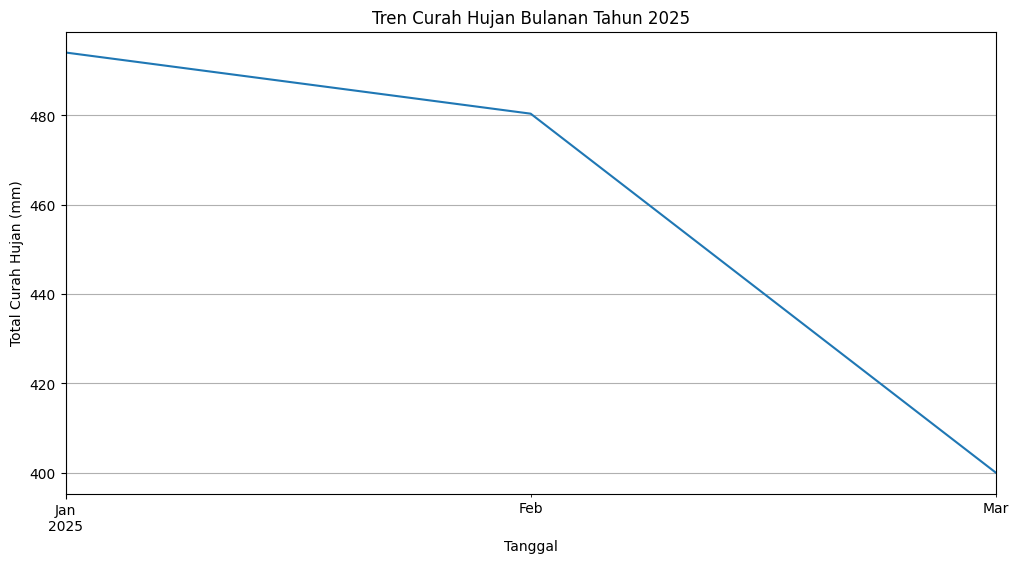

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_2025 = data_gabungan_test[data_gabungan_test['Tanggal'].dt.year == 2025]

plt.figure(figsize=(12, 6))
data_2025.set_index('Tanggal').resample('M')['Curah_Hujan'].sum().plot()
plt.title('Tren Curah Hujan Bulanan Tahun 2025')
plt.xlabel('Tanggal')
plt.ylabel('Total Curah Hujan (mm)')
plt.grid()
plt.show()

In [ ]:
Q1 = data_gabungan_test['Curah_Hujan'].quantile(0.25)
Q3 = data_gabungan_test['Curah_Hujan'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data_gabungan_test[(data_gabungan_test['Curah_Hujan'] < lower_bound) | (data_gabungan_test['Curah_Hujan'] > upper_bound)]

print("Jumlah outliers:", outliers.shape[0])
print(outliers)

print("Batas bawah:", lower_bound)
print("Batas atas:", upper_bound)

Jumlah outliers: 6
      Tanggal  Curah_Hujan
14 2025-01-15         94.4
39 2025-02-09         66.0
44 2025-02-14         75.7
55 2025-02-25         99.8
59 2025-03-01         60.6
72 2025-03-14         69.4
Batas bawah: -33.474999999999994
Batas atas: 56.724999999999994


#Handling Outliers

In [ ]:
data_gabungan_test['Curah_Hujan_Winsor'] = data_gabungan_test['Curah_Hujan'].clip(lower=lower_bound, upper=upper_bound)

In [ ]:
data_gabungan_test.to_excel("data_test_winsor.xlsx", index=False)

In [ ]:
data_gabungan_test

,Tanggal,Curah_Hujan,Curah_Hujan_Winsor
0,2025-01-01,26.7,26.7
1,2025-01-02,53.6,53.6
2,2025-01-03,26.6,26.6
3,2025-01-04,0.0,0.0
4,2025-01-05,2.0,2.0
...,...,...,...
85,2025-03-27,4.3,4.3
86,2025-03-28,2.5,2.5
87,2025-03-29,8.1,8.1
88,2025-03-30,4.2,4.2
